In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('../data/Mental Illness Survey 1.csv')
cols_to_check = ['Unnamed: 28', 'Unnamed: 29']
data.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am currently employed at least part-time,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months.,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,I have one of the following issues in addition to my illness,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Age,Gender,Household Income,Region,Device Type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Response,Response,Response,Response,Open-Ended Response,Response,Response,Response,Response,Response,Open-Ended Response,Open-Ended Response,Response,Response,Open-Ended Response,Response,Response,Open-Ended Response,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Response,Response,Response,Response,Response
1,6.630447e+09,168522804.0,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,NaN,NaN,NaN,NaN,06f645d7ea5af372d50a62bd17,No,High School or GED,No,No,0,No,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,Obsessive thinking,NaN,Panic attacks,NaN,NaN,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,6.630410e+09,168522804.0,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,NaN,NaN,NaN,NaN,abca2776418ff1fe24bb85e21f,Yes,Some Phd,Yes,No,0,Yes,No,Yes,No,No,1,22,No,Yes,0,No,No,0,Lack of concentration,Anxiety,Depression,NaN,NaN,Panic attacks,NaN,Tiredness,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,6.630402e+09,168522804.0,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,NaN,NaN,NaN,NaN,3800088cf4e55278b38bbe67f3,No,Completed Undergraduate,Yes,No,0,Yes,No,Yes,No,No,0,100,No,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,6.630335e+09,168522804.0,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,NaN,NaN,NaN,NaN,84585803a3cec189f89fe43d44,No,Some Undergraduate,Yes,No,NaN,No,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop


# Cleaning and Pre-processing Data
There is a lot to take care of with this dataset! Nulls, dtype conversions, label encoding, one-hot encoding...

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

We see that row 1 is not data but a secondary header. The only relevant data it appears to contain is the col names for symptoms (Depression, Anxiety, Obssesive Thoughts...).

So drop the first row and rename those columns.

In [4]:
data.drop(axis=0, index=0, inplace=True)
data.rename(columns={'Unnamed: 28':'Anxiety',
                     'Unnamed: 29':'Depression',
                     'Unnamed: 30':'Obsessive_thinking',
                     'Unnamed: 31':'Mood_swings',
                     'Unnamed: 32':'Panic_attacks',
                     'Unnamed: 33':'Compulsive_behavior',
                     'Unnamed: 34':'Tiredness',
                     data.columns[27] : 'Lack of concentration',
                     data.columns[19] : 'Total gaps in resume in months', # this col name was causing problems so need to rename
                    }, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 1 to 334
Data columns (total 40 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Respondent ID                                                 334 non-null    float64
 1   Collector ID                                                  334 non-null    float64
 2   Start Date                                                    334 non-null    object 
 3   End Date                                                      334 non-null    object 
 4   IP Address                                                    0 non-null      float64
 5   Email Address                                                 0 non-null      float64
 6   First Name                                                    0 non-null      float64
 7   Last Name                                                     0 non-nul

In [6]:
print("Sum of nulls per col:")
for col in data.columns:
    if data[col].isnull().sum() > 0:
        print(f'{col} : {data[col].isnull().sum()}')

Sum of nulls per col:
IP Address : 334
Email Address : 334
First Name : 334
Last Name : 334
How many days were you hospitalized for your mental illness : 37
Lack of concentration : 283
Anxiety : 234
Depression : 248
Obsessive_thinking : 292
Mood_swings : 296
Panic_attacks : 285
Compulsive_behavior : 305
Tiredness : 234
Region : 2


In [7]:
# col index 27 has 283 nulls and is "I have one of the following issues in addition to my illness"
# so add it to the list of cols to be renamed so can use as a symptom feature
data.iloc[:, 27].value_counts()

Lack of concentration    51
Name: Lack of concentration, dtype: int64

In [8]:
data['Collector ID'].unique()

array([1.68522804e+08])

After reviewing nulls, let's drop cols: 
IP Address
Email Address
First Name
Last name

Also drop:<br>
Responent ID - unhelpful<br>
Collector ID - there is only 1 value here<br>
Custom Data 1 - we don't know what this represents
'I am currently employed at least part-time' - since it is collecting the very similar data as the target "I am unemployed"

Rename "I have one of the following issues in addition to my illness" to "Lack of concentration"


In [9]:
cols_to_drop = ['I am currently employed at least part-time','Respondent ID','IP Address', 'Email Address', 'First Name', 'Last Name', 'Collector ID', 'Custom Data 1']
data.drop(cols_to_drop, axis=1, inplace=True)

In [10]:
cols_to_fill = ['Anxiety',
                'Depression',
                'Obsessive_thinking',
                'Mood_swings',
                'Panic_attacks',
                'Compulsive_behavior',
                'Tiredness',
                'Lack of concentration']

#data_clean = data[cols_to_fill].fillna(0, axis=1)
#data_clean = data.copy()

In [11]:
for col in cols_to_fill:
    data[col].fillna(0, inplace=True)
    data[col] = data[col].apply(lambda x : 0 if x == 0 else 1)

In [12]:
data.head()

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,No,High School or GED,No,No,0,No,Yes,No,Yes,24,35,Yes,Yes,0,No,No,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,Yes,Some Phd,Yes,No,0,No,Yes,No,No,1,22,No,Yes,0,No,No,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,No,Completed Undergraduate,Yes,No,0,No,Yes,No,No,0,100,No,Yes,0,No,No,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,No,Some Undergraduate,Yes,No,NaN,No,Yes,Yes,Yes,11,0,Yes,Yes,0,No,No,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,Yes,Completed Undergraduate,Yes,Yes,35,Yes,Yes,No,Yes,33,32,No,Yes,30,No,No,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


A lot of columns have "yes"/"no" answers so let's convert those to binary labels

In [13]:
from sklearn.preprocessing import LabelBinarizer
binary_cols = ['I identify as having a mental illness', 
               'I have my own computer separate from a smart phone',
               'I have been hospitalized before for my mental illness', 
               'I am legally disabled',
               'I have my regular access to the internet',
               'I live with my parents',
               'I have a gap in my resume',
               'I am unemployed',
               'I read outside of work and school',
               'I receive food stamps',
               'I am on section 8 housing'
              ]
le = LabelBinarizer()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [128]:
data.head()

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,High School or GED,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,Some Phd,1,0,0,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,Completed Undergraduate,1,0,0,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,Some Undergraduate,1,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,Completed Undergraduate,1,1,35,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


Now let's deal with the nulls in the remaining columns "How many days were you hospitalized for your mental illness" and 'Region'

In [15]:
# If impute with the mean, what will it be?
x = data['How many days were you hospitalized for your mental illness']
x.dropna()
x2 = pd.to_numeric(x)
x2.mean()

3.276094276094276

In [16]:
# let's check this against the similar yes/no question.
data['I have been hospitalized before for my mental illness'][data['How many days were you hospitalized for your mental illness'].isna()]

4      0
11     0
16     0
20     0
28     0
30     0
32     0
36     0
46     0
64     0
91     0
98     0
110    0
112    0
118    0
127    0
163    0
176    0
183    0
186    0
199    0
203    0
206    0
208    0
226    0
232    0
234    0
250    0
264    0
266    1
271    0
282    0
283    0
293    0
298    0
315    0
330    0
Name: I have been hospitalized before for my mental illness, dtype: int64

All but one person said yes to hospitalization and didn't report the days (i.e. null for days)
- drop this record and fill 0 for the rest

In [17]:
data.drop(index=266, axis=0)
data['How many days were you hospitalized for your mental illness'].fillna(0, inplace=True)

In [18]:
# only 2 regions with nulls - drop these since it is so few
data.dropna(subset=['Region'], axis=0, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1 to 334
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Start Date                                                    332 non-null    object
 1   End Date                                                      332 non-null    object
 2   I identify as having a mental illness                         332 non-null    int64 
 3   Education                                                     332 non-null    object
 4   I have my own computer separate from a smart phone            332 non-null    int64 
 5   I have been hospitalized before for my mental illness         332 non-null    int64 
 6   How many days were you hospitalized for your mental illness   332 non-null    object
 7   I am legally disabled                                         332 non-null    in

And let's convert appropriate cols to integers

In [20]:
# This won't work for some reason... pretty sure but with pandas
data.astype({'How many days were you hospitalized for your mental illness':'int32',
             'Total gaps in resume in months': 'int64',
             'Annual income (including any social welfare programs) in USD': 'int32',
             'Annual income from social welfare programs': 'int32',
             'How many times were you hospitalized for your mental illness': 'int32'
            })

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
1,01/15/2018 03:45:16 AM,01/15/2018 03:48:24 AM,0,High School or GED,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
2,01/15/2018 03:17:52 AM,01/15/2018 03:18:57 AM,1,Some Phd,1,0,0,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
3,01/15/2018 03:10:28 AM,01/15/2018 03:12:49 AM,0,Completed Undergraduate,1,0,0,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
4,01/15/2018 02:11:16 AM,01/15/2018 02:12:33 AM,0,Some Undergraduate,1,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
5,01/15/2018 01:24:12 AM,01/15/2018 01:26:34 AM,1,Completed Undergraduate,1,1,35,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,01/14/2018 03:34:38 AM,01/14/2018 03:36:44 AM,0,High School or GED,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
331,01/14/2018 03:34:38 AM,01/14/2018 03:36:09 AM,0,Some Undergraduate,1,0,0,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
332,01/14/2018 03:27:20 AM,01/14/2018 03:33:01 AM,0,Some Undergraduate,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
333,01/14/2018 03:29:31 AM,01/14/2018 03:32:45 AM,1,Some Undergraduate,0,1,1,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet


In [21]:
data['How many days were you hospitalized for your mental illness'] = pd.to_numeric(data['How many days were you hospitalized for your mental illness'])
data['Total gaps in resume in months'] = pd.to_numeric(data['Total gaps in resume in months'])
data['Annual income (including any social welfare programs) in USD'] = pd.to_numeric(data['Annual income (including any social welfare programs) in USD'])
data['Annual income from social welfare programs'] = pd.to_numeric(data['Annual income from social welfare programs'])
data['How many times were you hospitalized for your mental illness'] = pd.to_numeric(data['How many times were you hospitalized for your mental illness'])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1 to 334
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Start Date                                                    332 non-null    object
 1   End Date                                                      332 non-null    object
 2   I identify as having a mental illness                         332 non-null    int64 
 3   Education                                                     332 non-null    object
 4   I have my own computer separate from a smart phone            332 non-null    int64 
 5   I have been hospitalized before for my mental illness         332 non-null    int64 
 6   How many days were you hospitalized for your mental illness   332 non-null    int64 
 7   I am legally disabled                                         332 non-null    in

###### Convert dates to datetime dtypes

In [23]:
data['Total gaps in resume in months'].mean()

8.548192771084338

In [24]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
data['End Date'] = pd.to_datetime(data['End Date'])

In [25]:
data['I am unemployed']

1      1
2      0
3      0
4      1
5      0
      ..
330    1
331    0
332    0
333    1
334    0
Name: I am unemployed, Length: 332, dtype: int64

In [26]:
data.columns

Index(['Start Date', 'End Date', 'I identify as having a mental illness',
       'Education', 'I have my own computer separate from a smart phone',
       'I have been hospitalized before for my mental illness',
       'How many days were you hospitalized for your mental illness',
       'I am legally disabled', 'I have my regular access to the internet',
       'I live with my parents', 'I have a gap in my resume',
       'Total gaps in resume in months',
       'Annual income (including any social welfare programs) in USD',
       'I am unemployed', 'I read outside of work and school',
       'Annual income from social welfare programs', 'I receive food stamps',
       'I am on section 8 housing',
       'How many times were you hospitalized for your mental illness',
       'Lack of concentration', 'Anxiety', 'Depression', 'Obsessive_thinking',
       'Mood_swings', 'Panic_attacks', 'Compulsive_behavior', 'Tiredness',
       'Age', 'Gender', 'Household Income', 'Region', 'Device Type

##### RESET index now done dropping rows

In [27]:
data.reset_index(inplace=True, drop=True)
data.head()

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,High School or GED,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,Some Phd,1,0,0,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,Completed Undergraduate,1,0,0,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,Some Undergraduate,1,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,Completed Undergraduate,1,1,35,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [28]:
numeric_features = [feat for feat in data.columns if data[feat].dtype in ['int64', 'float64']]
object_cols = [col for col in data.columns if data[col].dtype in ['object']]

In [29]:
numeric_features

['I identify as having a mental illness',
 'I have my own computer separate from a smart phone',
 'I have been hospitalized before for my mental illness',
 'How many days were you hospitalized for your mental illness',
 'I am legally disabled',
 'I have my regular access to the internet',
 'I live with my parents',
 'I have a gap in my resume',
 'Total gaps in resume in months',
 'Annual income (including any social welfare programs) in USD',
 'I am unemployed',
 'I read outside of work and school',
 'Annual income from social welfare programs',
 'I receive food stamps',
 'I am on section 8 housing',
 'How many times were you hospitalized for your mental illness',
 'Lack of concentration',
 'Anxiety',
 'Depression',
 'Obsessive_thinking',
 'Mood_swings',
 'Panic_attacks',
 'Compulsive_behavior',
 'Tiredness']

# EDA with unencoded data

In [30]:
data.describe()

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.240964,0.873494,0.078313,2.930723,0.099398,0.963855,0.108434,0.246988,8.548193,37.539157,0.259036,0.888554,3.346386,0.066265,0.021084,1.201807,0.153614,0.301205,0.259036,0.126506,0.114458,0.147590,0.087349,0.295181
std,0.428314,0.332921,0.269069,13.396285,0.299647,0.186932,0.311397,0.431911,20.774594,30.707985,0.438767,0.315158,12.528778,0.249120,0.143882,8.139174,0.361123,0.459474,0.438767,0.332921,0.318847,0.355229,0.282773,0.456812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,30.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Distributions
#### Numeric Data

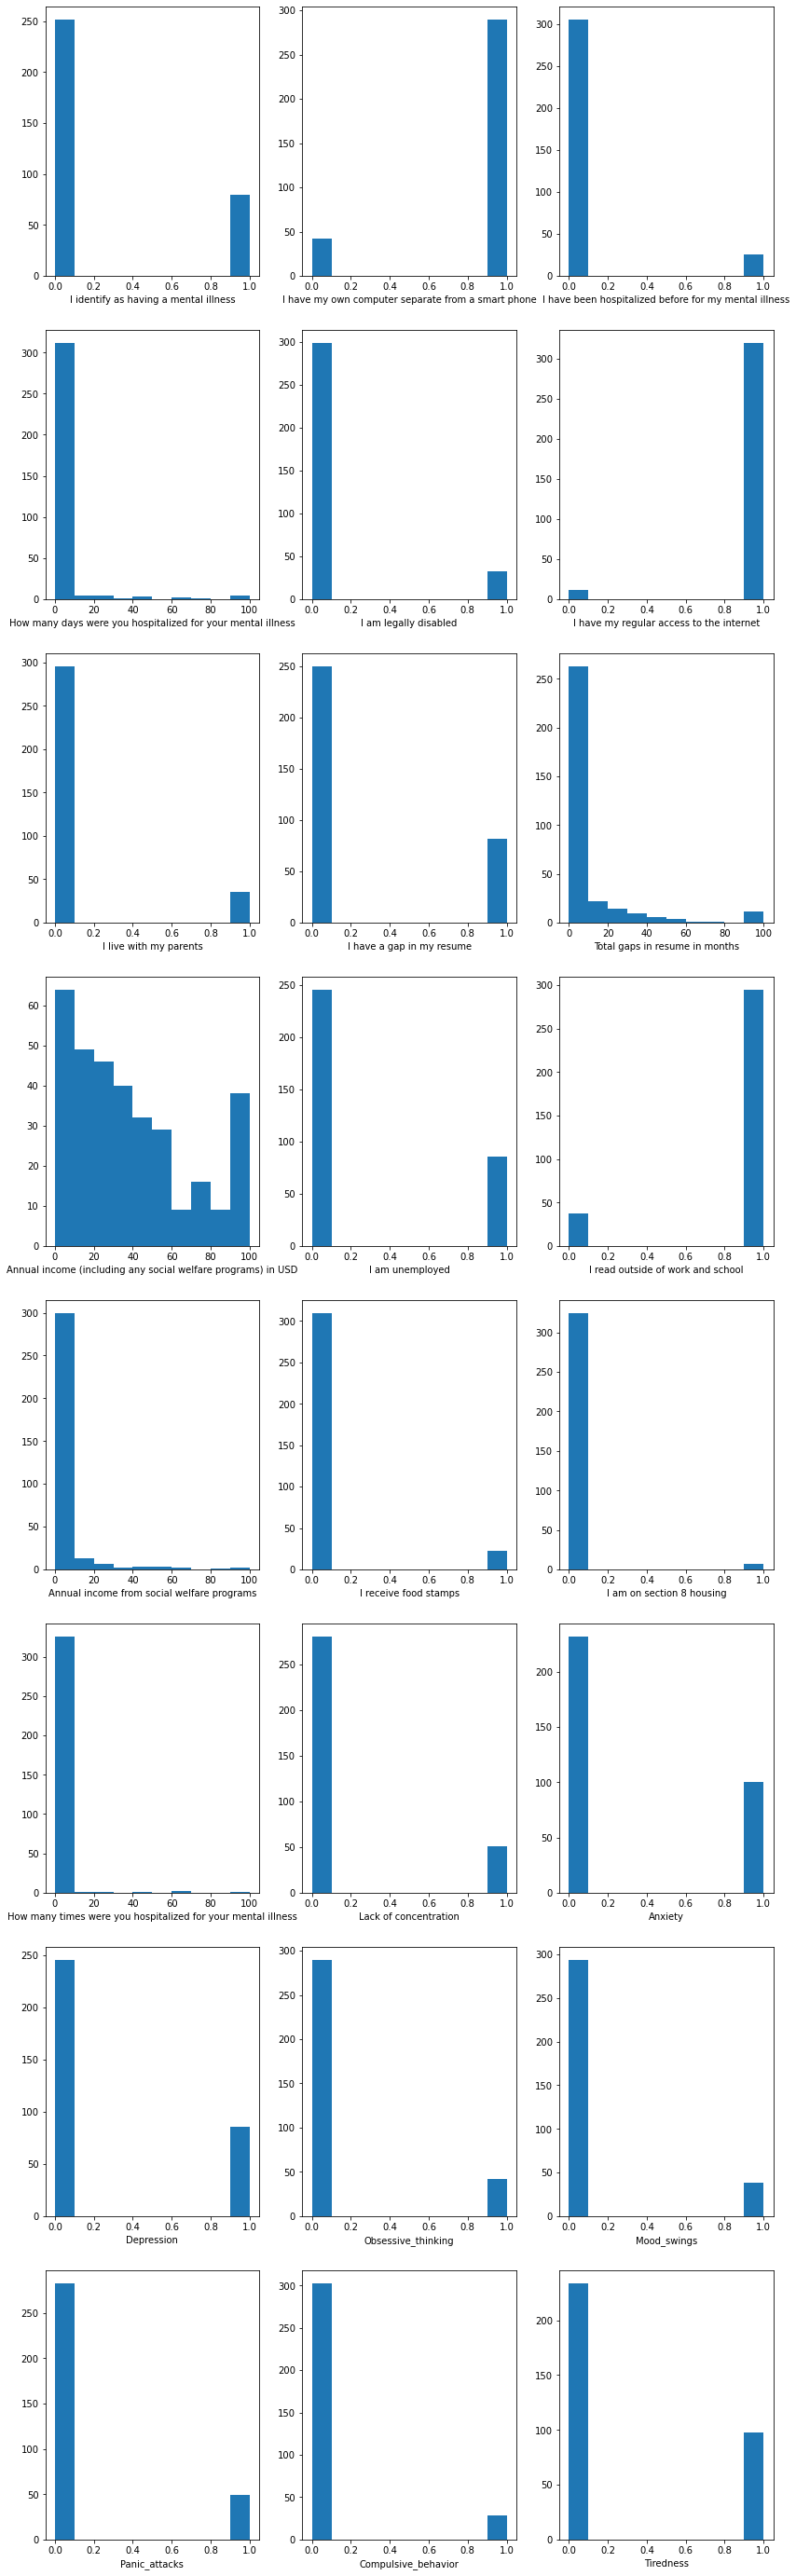

In [31]:
fig = plt.figure(figsize=(14, 50))

for i, col in enumerate(numeric_features):
    i += 1
    ax = fig.add_subplot(int(len(numeric_features)/3),3,i)
    ax.hist(data[col])
    ax.set_xlabel(col)

#### Categorical Data

In [192]:
plt.rcParams.update(plt.rcParamsDefault)

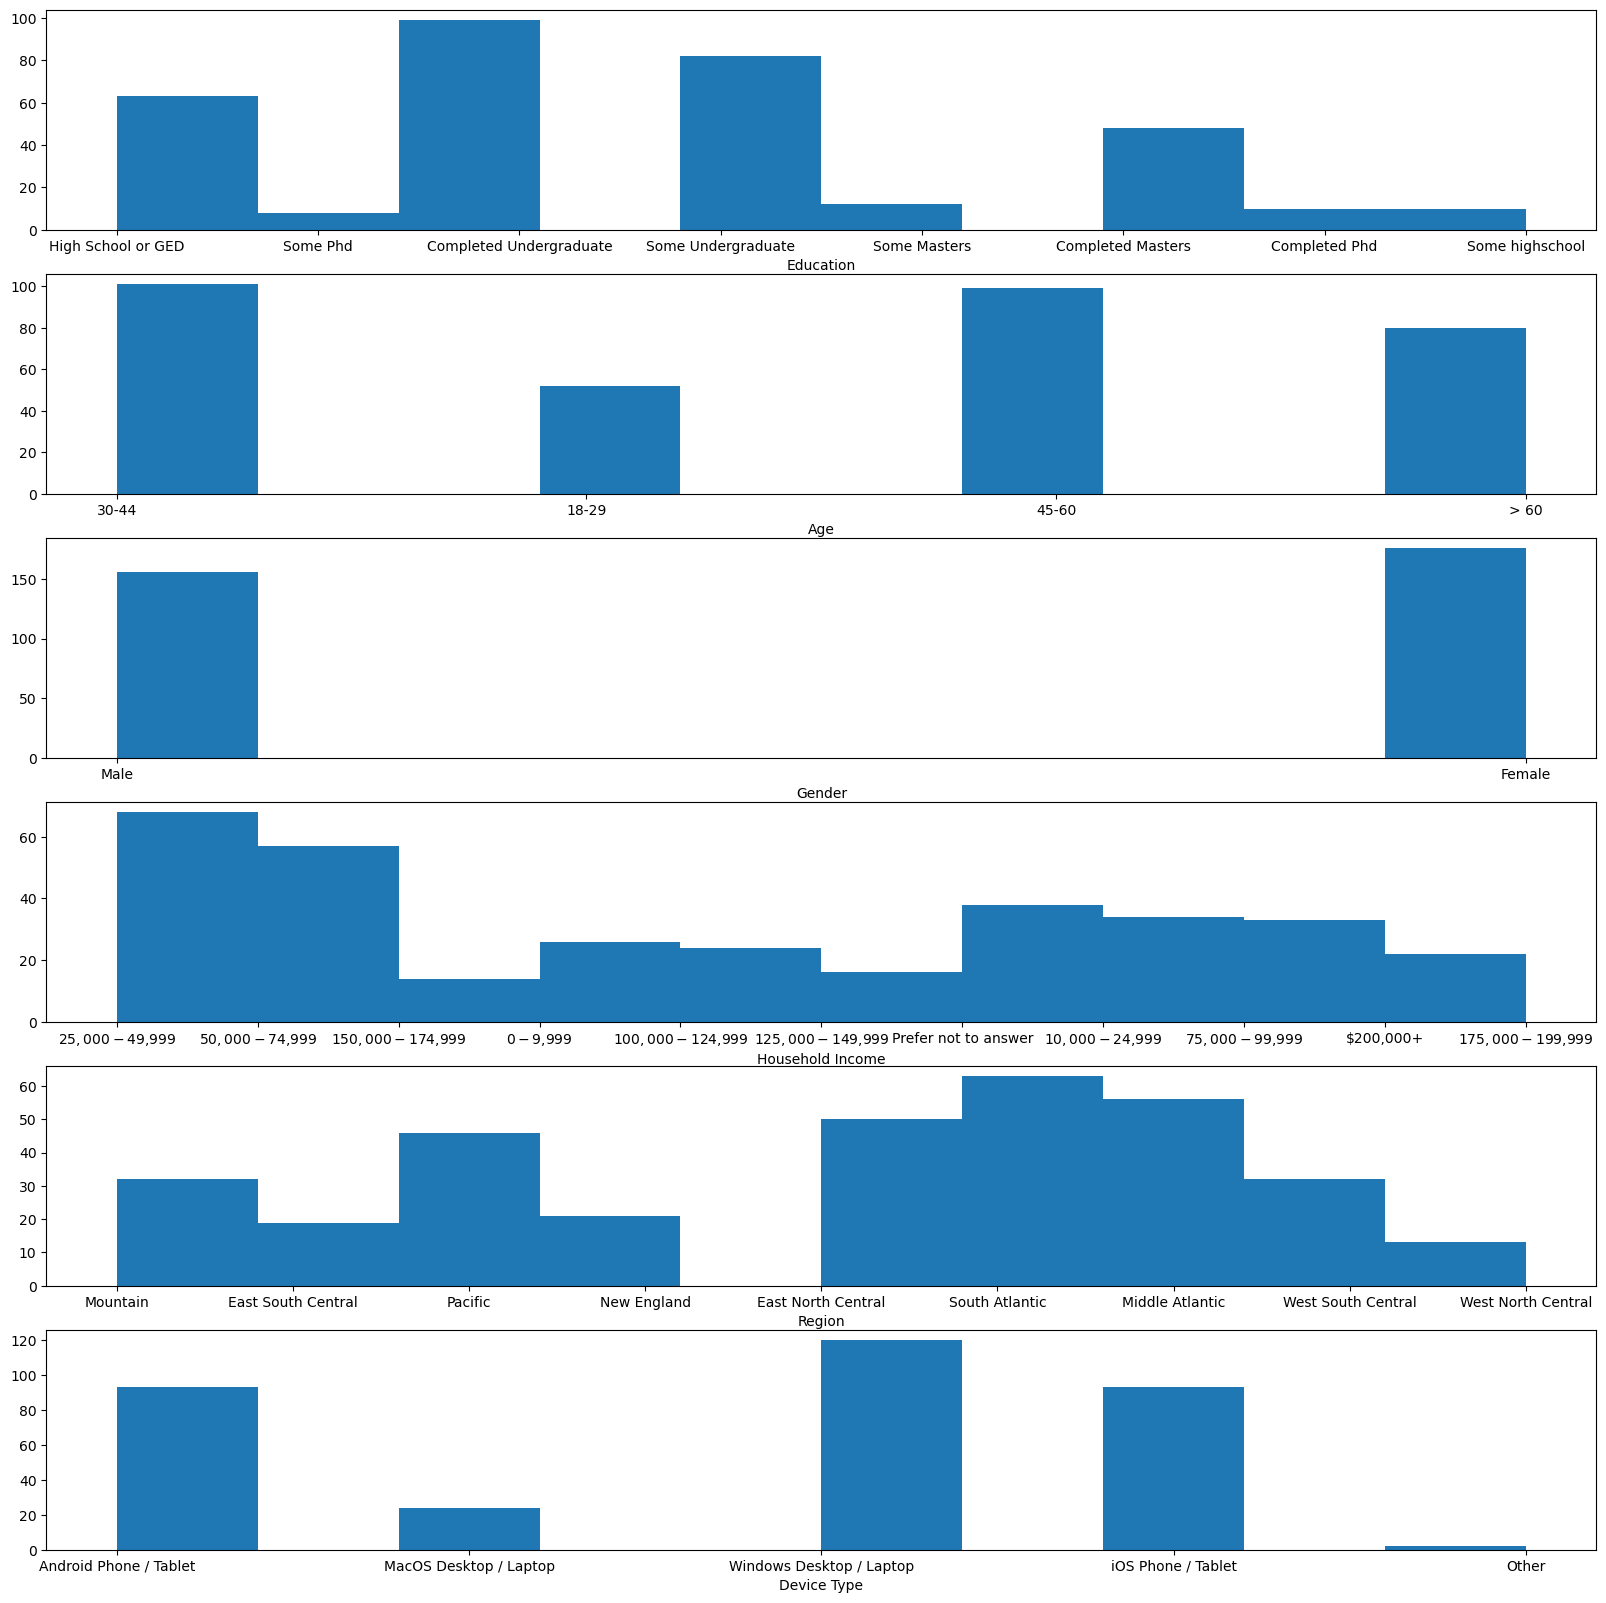

In [33]:
fig, axs = plt.subplots(len(object_cols), figsize=(20,20))

for i, col in enumerate(object_cols):
    axs[i].hist(data[col])
    axs[i].set_xlabel(col)

### Class Balance

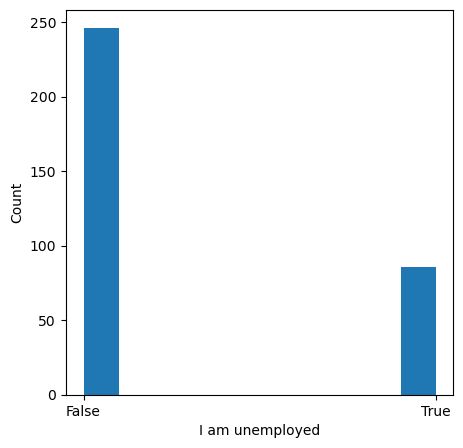

In [194]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(data['I am unemployed'])
ax.set_xlabel("I am unemployed")
ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(['False','True'])
plt.savefig('../img/class_balance.png', bbox_inches="tight")
plt.show()

So we see there is about a 3:1 ratio of employed to unemployed.
Note the class imbalance, so I will be sure to stratify and try out some resampling techniques.

### Univariate Skew
The closer to 0 the more normal the distribution of the feature.

In [197]:
data.skew().sort_values(ascending=False)

How many times were you hospitalized for your mental illness    9.430983
I am on section 8 housing                                       6.697389
How many days were you hospitalized for your mental illness     5.705170
Annual income from social welfare programs                      5.048643
I receive food stamps                                           3.503236
Total gaps in resume in months                                  3.235795
I have been hospitalized before for my mental illness           3.153405
Compulsive_behavior                                             2.936293
I am legally disabled                                           2.690036
I live with my parents                                          2.530145
Mood_swings                                                     2.433008
Obsessive_thinking                                              2.257341
Panic_attacks                                                   1.996152
Lack of concentration                              

Given there are no continuous features, this is of limited use

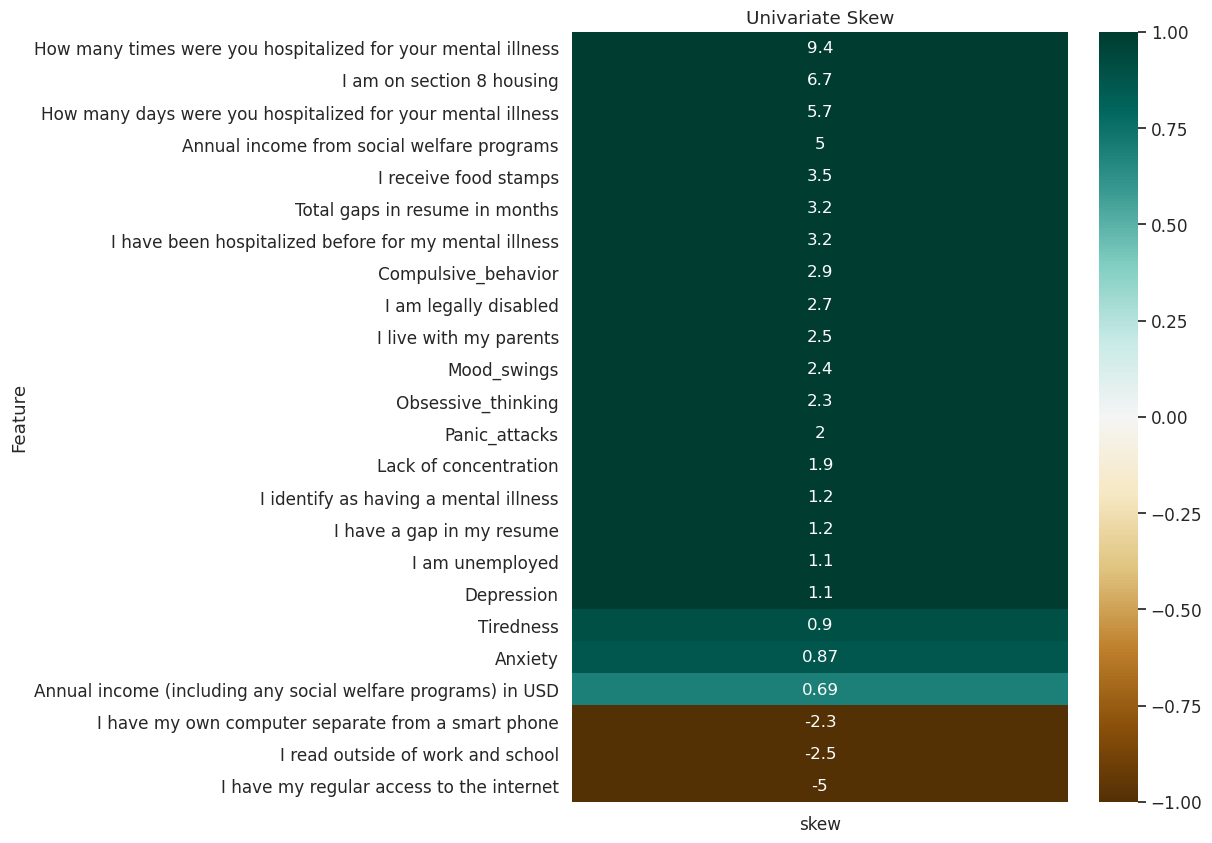

In [205]:
df_skew = pd.DataFrame(data=data.skew().sort_values(ascending=False).values, index=data.skew().sort_values(ascending=False).index, columns=['skew'])
plt.figure(figsize=(8, 10))

sns.set(font_scale=1.1) 
heatmap3 = sns.heatmap(df_skew, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"size": 12})
heatmap3.set_title('Univariate Skew')
heatmap3.set_ylabel('Feature')
plt.savefig('../img/uni_skew.png', bbox_inches='tight')

# Model Check with Numeric Features Only

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

rf_class = RandomForestClassifier(random_state=17)

y_numeric = data['I am unemployed']
X_numeric = data[numeric_features].drop(['I am unemployed'], axis=1)

In [37]:
list(X_numeric.columns)

['I identify as having a mental illness',
 'I have my own computer separate from a smart phone',
 'I have been hospitalized before for my mental illness',
 'How many days were you hospitalized for your mental illness',
 'I am legally disabled',
 'I have my regular access to the internet',
 'I live with my parents',
 'I have a gap in my resume',
 'Total gaps in resume in months',
 'Annual income (including any social welfare programs) in USD',
 'I read outside of work and school',
 'Annual income from social welfare programs',
 'I receive food stamps',
 'I am on section 8 housing',
 'How many times were you hospitalized for your mental illness',
 'Lack of concentration',
 'Anxiety',
 'Depression',
 'Obsessive_thinking',
 'Mood_swings',
 'Panic_attacks',
 'Compulsive_behavior',
 'Tiredness']

# Basic Model - Numeric Features Only

## Modeling without One-Hot Encoding, Class Balancing, Feature Selectivity , or Feature Engineering

##### I am curious how a model will do with just the original numeric data and not being fit on any encoded data

In [38]:
# classes are pretty imbalanced
y_numeric.value_counts()

0    246
1     86
Name: I am unemployed, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_numeric, test_size=.2, random_state=17, stratify=y_numeric)
rf_class.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

In [40]:
rf_class.score(X_test, y_test)

0.7313432835820896

In [41]:
y_pred = rf_class.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')

Accuracy: 0.7313432835820896
Recall: 0.23529411764705882
F1: 0.30769230769230765


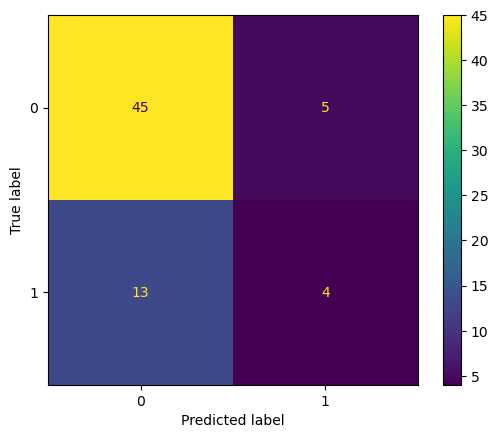

In [43]:
plot_confusion_matrix(rf_class, X_test, y_test)

In [44]:
rf_class.feature_importances_

array([0.01598025, 0.03434265, 0.00795851, 0.03495494, 0.04149225,
       0.02209887, 0.0300115 , 0.0305859 , 0.14859482, 0.28801545,
       0.02405437, 0.04746178, 0.02485325, 0.00653073, 0.02680353,
       0.02123771, 0.03751016, 0.03160263, 0.01795366, 0.01576386,
       0.04139891, 0.007485  , 0.04330927])

In [45]:
rf_class.feature_importances_.sum()

1.0000000000000002

In [46]:
f = pd.DataFrame(data=rf_class.feature_importances_, index=X_numeric.columns)
f.sort_values(by=[0], ascending=False)

,0
Annual income (including any social welfare programs) in USD,0.288015
Total gaps in resume in months,0.148595
Annual income from social welfare programs,0.047462
Tiredness,0.043309
I am legally disabled,0.041492
Panic_attacks,0.041399
Anxiety,0.037510
How many days were you hospitalized for your mental illness,0.034955
I have my own computer separate from a smart phone,0.034343
Depression,0.031603


### Add Cross Validataion for better validation of results
#### Since we have imbalanced classes, stratify the folds using StratifiedKFold

In [47]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline

In [48]:
def run_cv_rf(X, y):
    pipe = make_pipeline(RandomForestClassifier())
    skf = StratifiedKFold(n_splits=10, random_state=17, shuffle=True)
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='accuracy')
    print(f'Accuracy Scores: {scores}')
    print(f'\tMean:{scores.mean()}')
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='recall')
    print(f'Recall Scores: {scores}')
    print(f'\tMean:{scores.mean()}')
    scores = cross_val_score(pipe, X, y, cv=skf, scoring='f1')
    print(f'F1 Scores: {scores}')
    print(f'\tMean:{scores.mean()}')

In [49]:
run_cv_rf(X_numeric, y_numeric)

Accuracy Scores: [0.67647059 0.85294118 0.75757576 0.6969697  0.78787879 0.78787879
 0.78787879 0.75757576 0.78787879 0.75757576]
	Mean:0.7650623885918004
Recall Scores: [0.11111111 0.66666667 0.44444444 0.11111111 0.44444444 0.22222222
 0.375      0.125      0.5        0.25      ]
	Mean:0.325
F1 Scores: [0.15384615 0.70588235 0.57142857 0.16666667 0.53333333 0.18181818
 0.46153846 0.18181818 0.42857143 0.33333333]
	Mean:0.3718236665295489


## Drop Unwanted Cols
### Should I remove Annual Income data?
- Common sense indicates there would likely be a high collinearity with unemployment, though the EDA doesn't show this as there is a weak correlation between these 2 features and the target 'I am unemployed'
- It is unclear how much the income level is a result of unemployment, a risk factor of umemployment, or both.
- The imagined use case for this model is for a therapist to use with clients to predict and possibly prevent unemployment, so the therapist would have access to the income information and is therefore an arguement to keep the data.

In [50]:
numeric_features_no_income = [x for x in numeric_features if x not in ['Annual income (including any social welfare programs) in USD', 'Annual income from social welfare programs']]

In [51]:
y_numeric_2 = data['I am unemployed']
X_numeric_2 = data[numeric_features_no_income].drop(['I am unemployed'], axis=1)
X_numeric_2

,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,I read outside of work and school,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness
0,0,0,0,0,0,1,0,1,24,1,0,0,0,1,1,1,1,0,1,0,0
1,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1
2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,1,11,1,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,35,1,1,0,1,33,1,0,0,4,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
328,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
329,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0
330,1,0,1,1,1,1,1,1,30,1,1,0,3,1,1,1,1,1,1,1,1


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric_2, y_numeric_2, test_size=.2, random_state=17, stratify=y_numeric_2)
rf_model = RandomForestClassifier(random_state=17)

rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.6716417910447762

As expected, the accuracy drops when income data is removed

In [53]:
y_pred = rf_model.predict(X_test)
recall_score(y_test, y_pred)

0.11764705882352941

Recall drops as well.

In [54]:
run_cv_rf(X_numeric_2, y_numeric_2)

Accuracy Scores: [0.67647059 0.76470588 0.6969697  0.66666667 0.66666667 0.72727273
 0.78787879 0.72727273 0.78787879 0.6969697 ]
	Mean:0.7198752228163994
Recall Scores: [0.22222222 0.55555556 0.         0.         0.55555556 0.11111111
 0.25       0.125      0.375      0.5       ]
	Mean:0.2694444444444445
F1 Scores: [0.26666667 0.58823529 0.         0.         0.5        0.18181818
 0.4        0.         0.61538462 0.47058824]
	Mean:0.3022692993281229


Again, all scores are lower after dropping income data.

# Finish Preprocessing
## Ordinal Encoding

In [150]:
cat_features = [col for col in data.columns if data[col].dtype == 'object']

In [151]:
cat_features

['Education', 'Age', 'Gender', 'Household Income', 'Region', 'Device Type']

In [152]:
data['Education'] = data['Education'].replace('Some\xa0Masters', 'Some Masters')
data['Education'].unique()

array(['High School or GED', 'Some Phd', 'Completed Undergraduate',
       'Some Undergraduate', 'Some Masters', 'Completed Masters',
       'Completed Phd', 'Some highschool'], dtype=object)

In [153]:
data['Age'].unique()

array(['30-44', '18-29', '45-60', '> 60'], dtype=object)

In [154]:
data['Household Income'].unique()

array(['$25,000-$49,999', '$50,000-$74,999', '$150,000-$174,999',
       '$0-$9,999', '$100,000-$124,999', '$125,000-$149,999',
       'Prefer not to answer', '$10,000-$24,999', '$75,000-$99,999',
       '$200,000+', '$175,000-$199,999'], dtype=object)

In [155]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [156]:
ordered_edu = {'Some highschool' : 0,
                'High School or GED' : 1, 
                'Some Undergraduate' : 2,
                'Completed Undergraduate' : 3,
                'Some Masters' : 4,
                'Some Phd' : 5, 
                'Completed Masters' : 6,
                'Completed Phd' : 7}
ordered_age = {'18-29':0, 
               '30-44':1, 
               '45-60':2, 
               '> 60':3}
ordered_income = {'Prefer not to answer' : 0,
                    '$0-$9,999' : 1, 
                    '$10,000-$24,999' : 2,
                    '$25,000-$49,999' : 3, 
                    '$50,000-$74,999' : 4, 
                    '$75,000-$99,999' : 5,
                    '$100,000-$124,999' : 6,
                    '$125,000-$149,999' : 7,
                    '$150,000-$174,999' : 8,
                    '$175,000-$199,999' : 9,
                    '$200,000+' : 10 
                 }
ordered_gender = {'Male':0, 'Female':1}
ord_dicts = {'Age':ordered_age, 'Education':ordered_edu, 'Household Income':ordered_income, 'Gender':ordered_gender}

encoded_data = data.copy()
for k, v, in ord_dicts.items():
    encoded_data[k] = encoded_data[k].replace(v)

## One-Hot Encoding
### Get Dummies approach

In [157]:
# reset the categorical features to see what is left over after ordinal encoding
cat_features = [col for col in encoded_data.columns if encoded_data[col].dtype == 'object']

In [158]:
cat_features

['Region', 'Device Type']

In [159]:
dummy_data = pd.get_dummies(encoded_data)
dummy_data

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,1,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,5,1,0,0,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,3,1,0,0,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,2,1,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,3,1,1,35,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,1,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2018-01-14 03:34:38,2018-01-14 03:36:44,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
328,2018-01-14 03:34:38,2018-01-14 03:36:09,0,2,1,0,0,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0
329,2018-01-14 03:27:20,2018-01-14 03:33:01,0,2,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,3,1,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0
330,2018-01-14 03:29:31,2018-01-14 03:32:45,1,2,0,1,1,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


### SKLearn OneHotEncoder Approach

In [160]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(sparse=False)
oh_data = oh_encoder.fit_transform(encoded_data[cat_features])
oh_data.shape

(332, 14)

In [161]:
oh_encoder.categories_

[array(['East North Central', 'East South Central', 'Middle Atlantic',
        'Mountain', 'New England', 'Pacific', 'South Atlantic',
        'West North Central', 'West South Central'], dtype=object),
 array(['Android Phone / Tablet', 'MacOS Desktop / Laptop', 'Other',
        'Windows Desktop / Laptop', 'iOS Phone / Tablet'], dtype=object)]

In [162]:
# create column headers for onehot encoded data
col_headers = []
for i, cat in enumerate(oh_encoder.categories_):
    for label in cat:
        col_headers.append(cat_features[i] + '_' + label)
        
col_headers

['Region_East North Central',
 'Region_East South Central',
 'Region_Middle Atlantic',
 'Region_Mountain',
 'Region_New England',
 'Region_Pacific',
 'Region_South Atlantic',
 'Region_West North Central',
 'Region_West South Central',
 'Device Type_Android Phone / Tablet',
 'Device Type_MacOS Desktop / Laptop',
 'Device Type_Other',
 'Device Type_Windows Desktop / Laptop',
 'Device Type_iOS Phone / Tablet']

In [163]:
# How do I join this back to the main dataframe? Need to create the column headers from the .categories_ somehow
oh_df = pd.DataFrame(data=oh_data, columns=col_headers)
oh_df

,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Merge the OH data with the original df

In [164]:
encoded_data = encoded_data.drop(columns=cat_features, axis=1)
encoded_data = pd.concat([encoded_data, oh_df], axis=1)
encoded_data

,Start Date,End Date,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet
0,2018-01-15 03:45:16,2018-01-15 03:48:24,0,1,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2018-01-15 03:17:52,2018-01-15 03:18:57,1,5,1,0,0,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2018-01-15 03:10:28,2018-01-15 03:12:49,0,3,1,0,0,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2018-01-15 02:11:16,2018-01-15 02:12:33,0,2,1,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2018-01-15 01:24:12,2018-01-15 01:26:34,1,3,1,1,35,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2018-01-14 03:34:38,2018-01-14 03:36:44,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
328,2018-01-14 03:34:38,2018-01-14 03:36:09,0,2,1,0,0,0,1,1,0,0,62,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
329,2018-01-14 03:27:20,2018-01-14 03:33:01,0,2,1,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,3,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
330,2018-01-14 03:29:31,2018-01-14 03:32:45,1,2,0,1,1,1,1,1,1,30,12,1,1,12,1,0,3,1,1,1,1,1,1,1,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## Feature Engineering
- Create col that is the measure of how long it took a person to complete the survey in seconds - perhaps there is a relationship between mental health symptoms reported and time to complete survey

In [165]:
encoded_data['time_to_complete'] = encoded_data['End Date'] - encoded_data['Start Date']
encoded_data['time_to_complete'] = encoded_data['time_to_complete'].apply(lambda x : x.total_seconds())
encoded_data.drop(['Start Date', 'End Date'], axis=1, inplace=True)
encoded_data.head()

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet,time_to_complete
0,0,1,0,0,0,0,1,0,1,24,35,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188.0
1,1,5,1,0,0,0,1,0,0,1,22,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
2,0,3,1,0,0,0,1,0,0,0,100,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141.0
3,0,2,1,0,0,0,1,1,1,11,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,77.0
4,1,3,1,1,35,1,1,0,1,33,32,0,1,30,0,0,4,1,1,1,1,1,1,1,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,142.0


# EDA With Fully Encoded Data

## Basic EDA
more in depth approaches were done with Tableau

In [166]:
corr_mat = encoded_data.corr()
print(type(corr_mat))
corr_mat

<class 'pandas.core.frame.DataFrame'>


,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I am unemployed,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet,time_to_complete
I identify as having a mental illness,1.000000,-0.014736,-0.124569,0.438702,0.285140,0.236531,-0.079559,0.143277,0.248902,0.218366,-0.068940,0.133062,0.042875,0.067722,0.076414,0.015357,0.126401,0.365467,0.566523,0.711796,0.421187,0.438978,0.440670,0.399410,0.283889,-0.297578,0.064777,-0.055357,-0.040332,0.103749,0.009517,0.054630,-0.001743,0.018667,-0.128978,-0.004812,0.054630,0.087678,0.060291,-0.043863,-0.101384,-0.006425,-0.045063
Education,-0.014736,1.000000,0.160960,-0.100259,-0.093574,-0.081297,0.072865,-0.196342,-0.178326,-0.151927,0.234924,-0.189739,0.064892,-0.006743,-0.110413,-0.099264,-0.065349,-0.032784,-0.206578,-0.081900,-0.145732,-0.196224,-0.210086,-0.135829,-0.041895,0.241430,-0.119060,0.422631,-0.005116,-0.061833,0.078338,-0.065716,-0.023259,0.056666,0.051353,-0.086832,-0.037129,-0.235655,0.175135,0.156052,0.057591,0.046153,-0.018951
I have my own computer separate from a smart phone,-0.124569,0.160960,1.000000,-0.125153,-0.132710,-0.115848,0.217577,-0.129558,-0.181248,-0.166416,0.095642,-0.209314,0.009193,-0.022781,-0.226461,-0.007219,-0.016193,-0.038905,-0.204402,-0.105903,-0.127750,-0.176252,-0.097106,-0.074816,-0.011967,0.207020,-0.104118,0.221962,0.008241,0.054754,0.026238,0.032183,0.024442,-0.083422,-0.023804,-0.063317,0.032183,-0.307408,0.036254,0.029627,0.229736,0.035615,-0.039277
I have been hospitalized before for my mental illness,0.438702,-0.100259,-0.125153,1.000000,0.532061,0.315345,-0.063684,0.078631,0.223006,0.181463,-0.048637,0.185914,0.031978,0.179232,0.192774,0.113295,0.359713,0.155649,0.248491,0.339456,0.361236,0.247352,0.321223,0.267187,0.155472,-0.101753,0.049798,-0.080865,0.002644,-0.023552,0.108214,-0.057212,0.016370,0.045353,-0.083881,0.056755,-0.057212,0.142728,0.048508,-0.022693,-0.079287,-0.081967,0.111325
How many days were you hospitalized for your mental illness,0.285140,-0.093574,-0.132710,0.532061,1.000000,0.241055,-0.043228,0.145203,0.168487,0.106685,-0.028543,0.133615,-0.042622,0.089587,0.014959,0.035243,0.583717,-0.029019,0.175680,0.218938,0.203160,0.127055,0.256735,0.167490,0.002364,-0.055396,0.006404,-0.118832,-0.039372,0.009032,0.109372,0.005507,-0.010680,-0.008352,-0.053773,-0.030299,0.006270,0.080956,0.037966,-0.017057,-0.078598,-0.015824,0.080184
I am legally disabled,0.236531,-0.081297,-0.115848,0.315345,0.241055,1.000000,0.010397,0.143165,0.136546,0.196026,-0.165082,0.332086,0.021681,0.135654,0.235273,0.091391,0.073508,0.165583,0.111038,0.240171,0.176417,0.165155,0.145590,0.146810,0.094002,0.053812,-0.090648,-0.110531,-0.027299,0.091512,0.038545,0.027947,-0.044970,0.012463,-0.058077,-0.015164,-0.006165,0.106623,-0.053862,-0.025863,0.064380,-0.139980,0.050380
I have my regular access to the internet,-0.079559,0.072865,0.217577,-0.063684,-0.043228,0.010397,1.000000,-0.036268,-0.038772,-0.093683,0.102351,-0.106510,0.033982,-0.052687,-0.143039,0.028420,-0

In [167]:
corr_mat.loc['I identify as having a mental illness'].sort_values(ascending=False)

I identify as having a mental illness                           1.000000
Depression                                                      0.711796
Anxiety                                                         0.566523
Panic_attacks                                                   0.440670
Mood_swings                                                     0.438978
I have been hospitalized before for my mental illness           0.438702
Obsessive_thinking                                              0.421187
Compulsive_behavior                                             0.399410
Lack of concentration                                           0.365467
How many days were you hospitalized for your mental illness     0.285140
Tiredness                                                       0.283889
I have a gap in my resume                                       0.248902
I am legally disabled                                           0.236531
Total gaps in resume in months                     

##### What is the correlation between having a mental health illness and unemployment?

In [168]:
corr_mat.loc['I identify as having a mental illness']['I am unemployed']

0.13306219561789548

<AxesSubplot:>

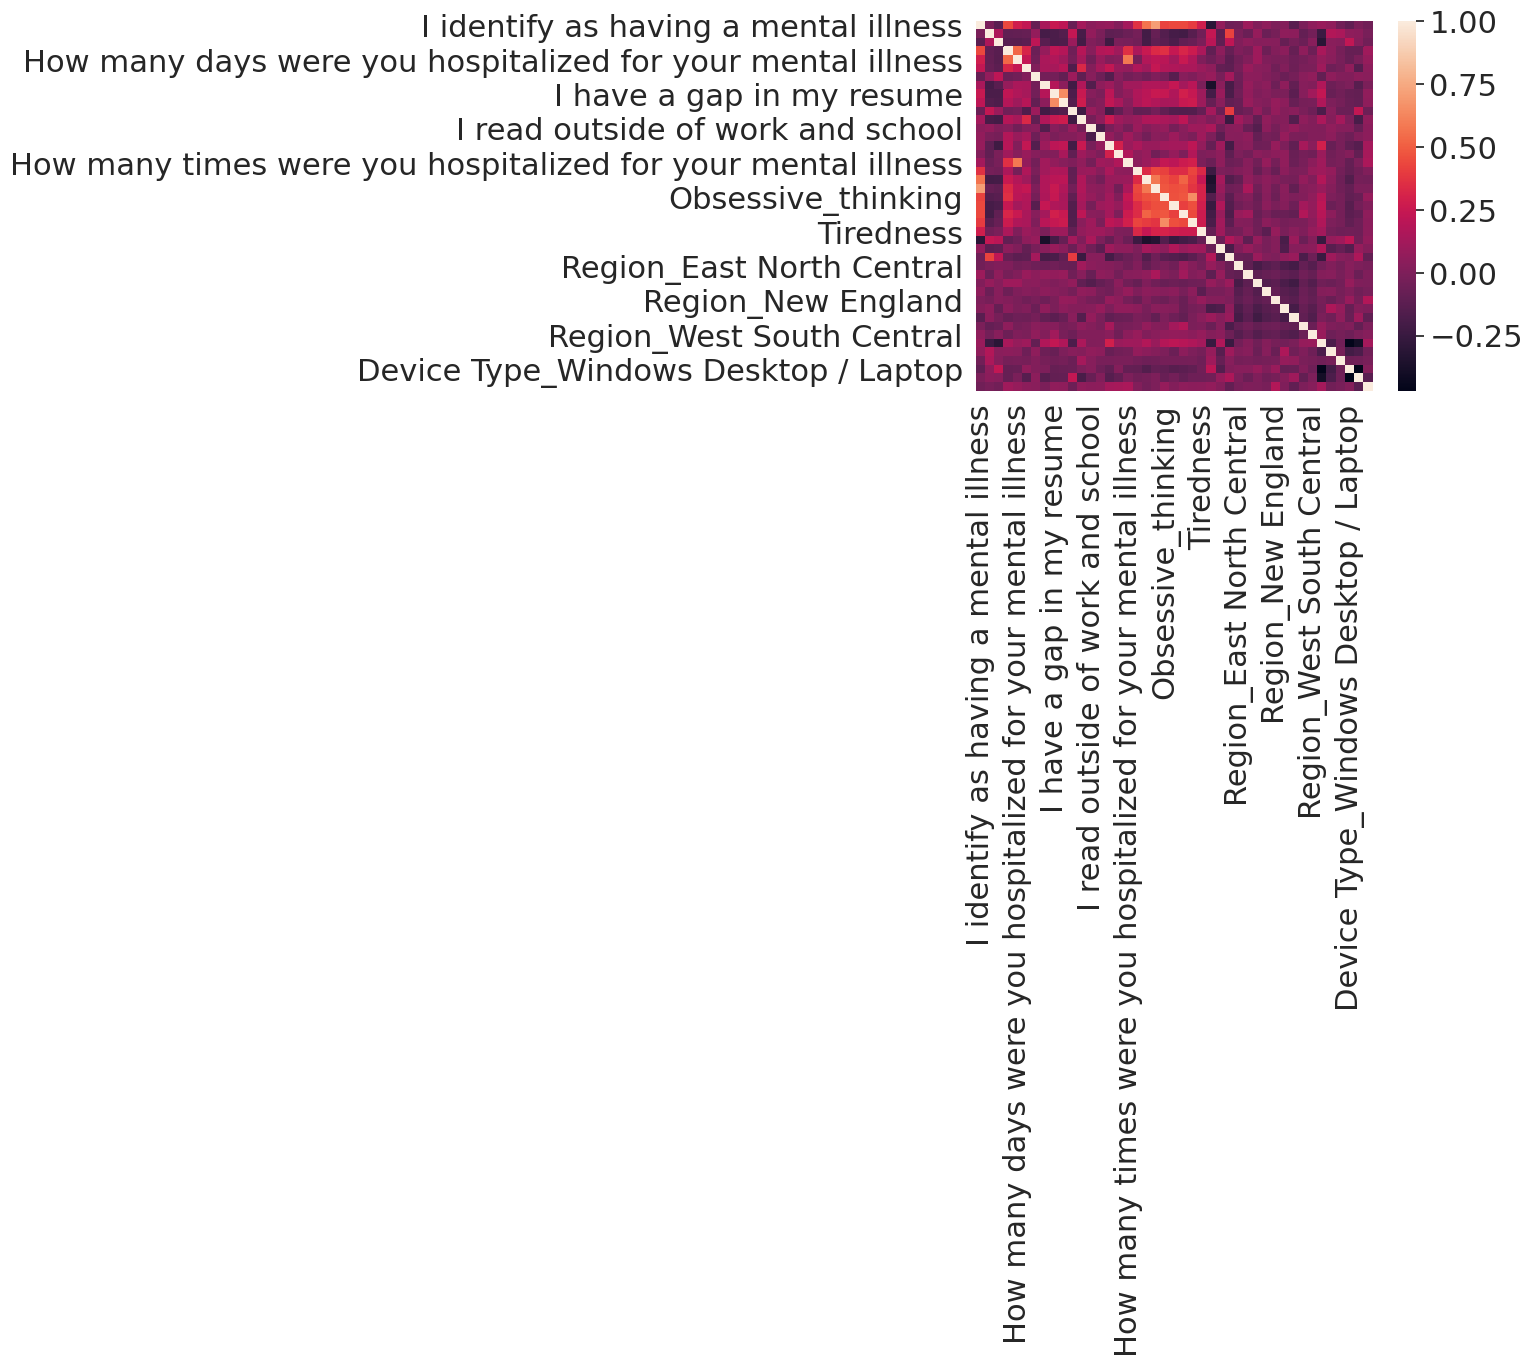

In [169]:
import seaborn as sns

sns.heatmap(encoded_data.corr())

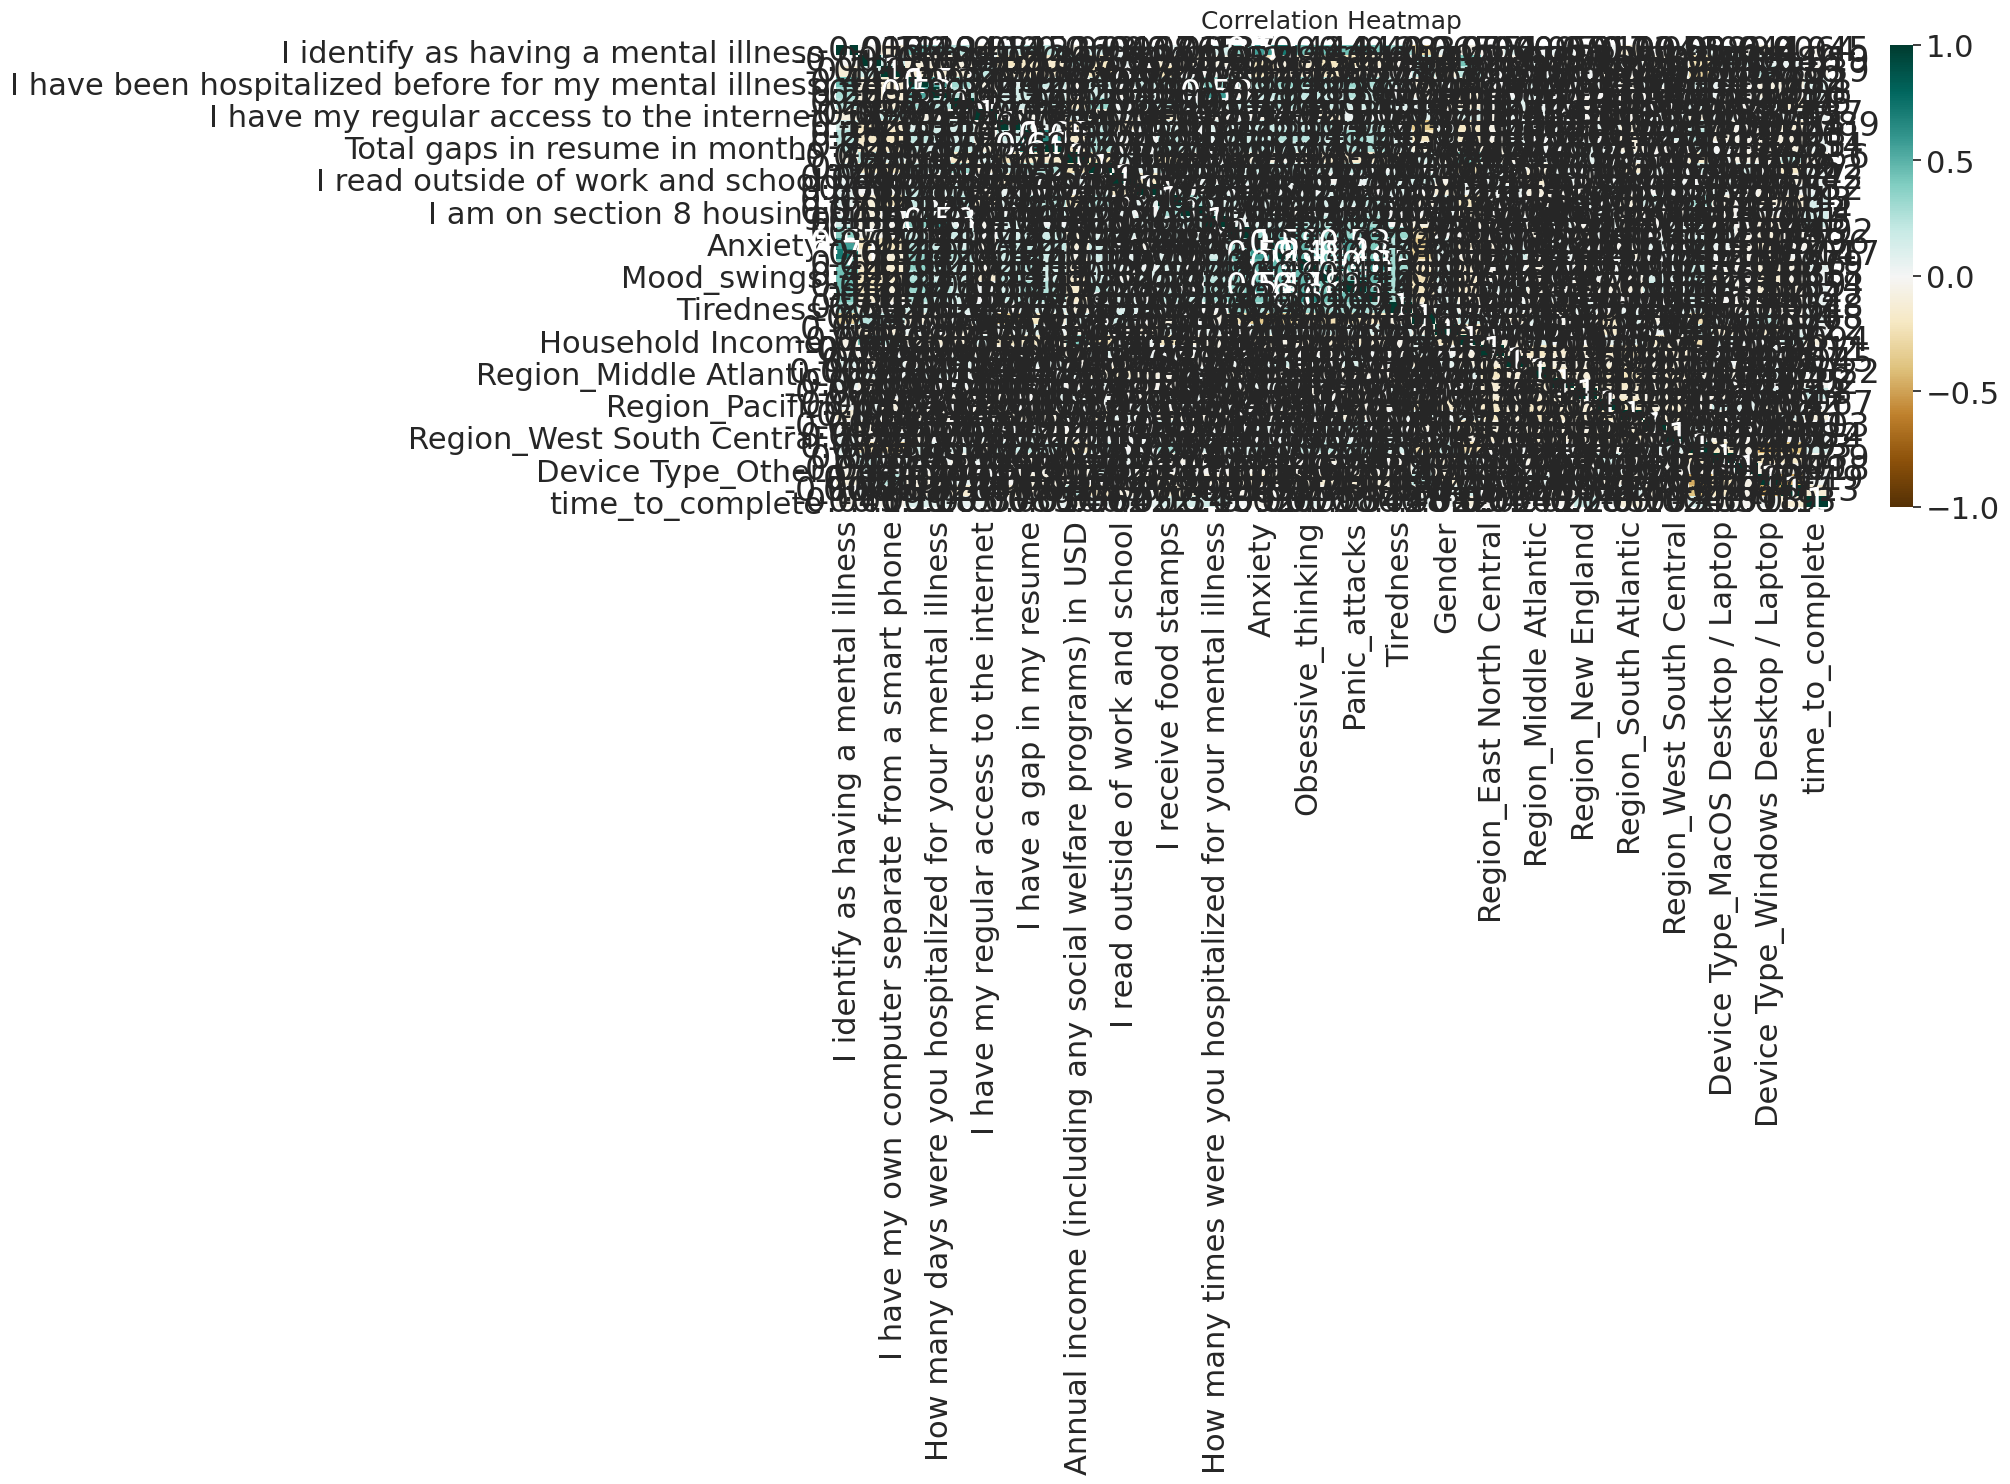

In [170]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(encoded_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

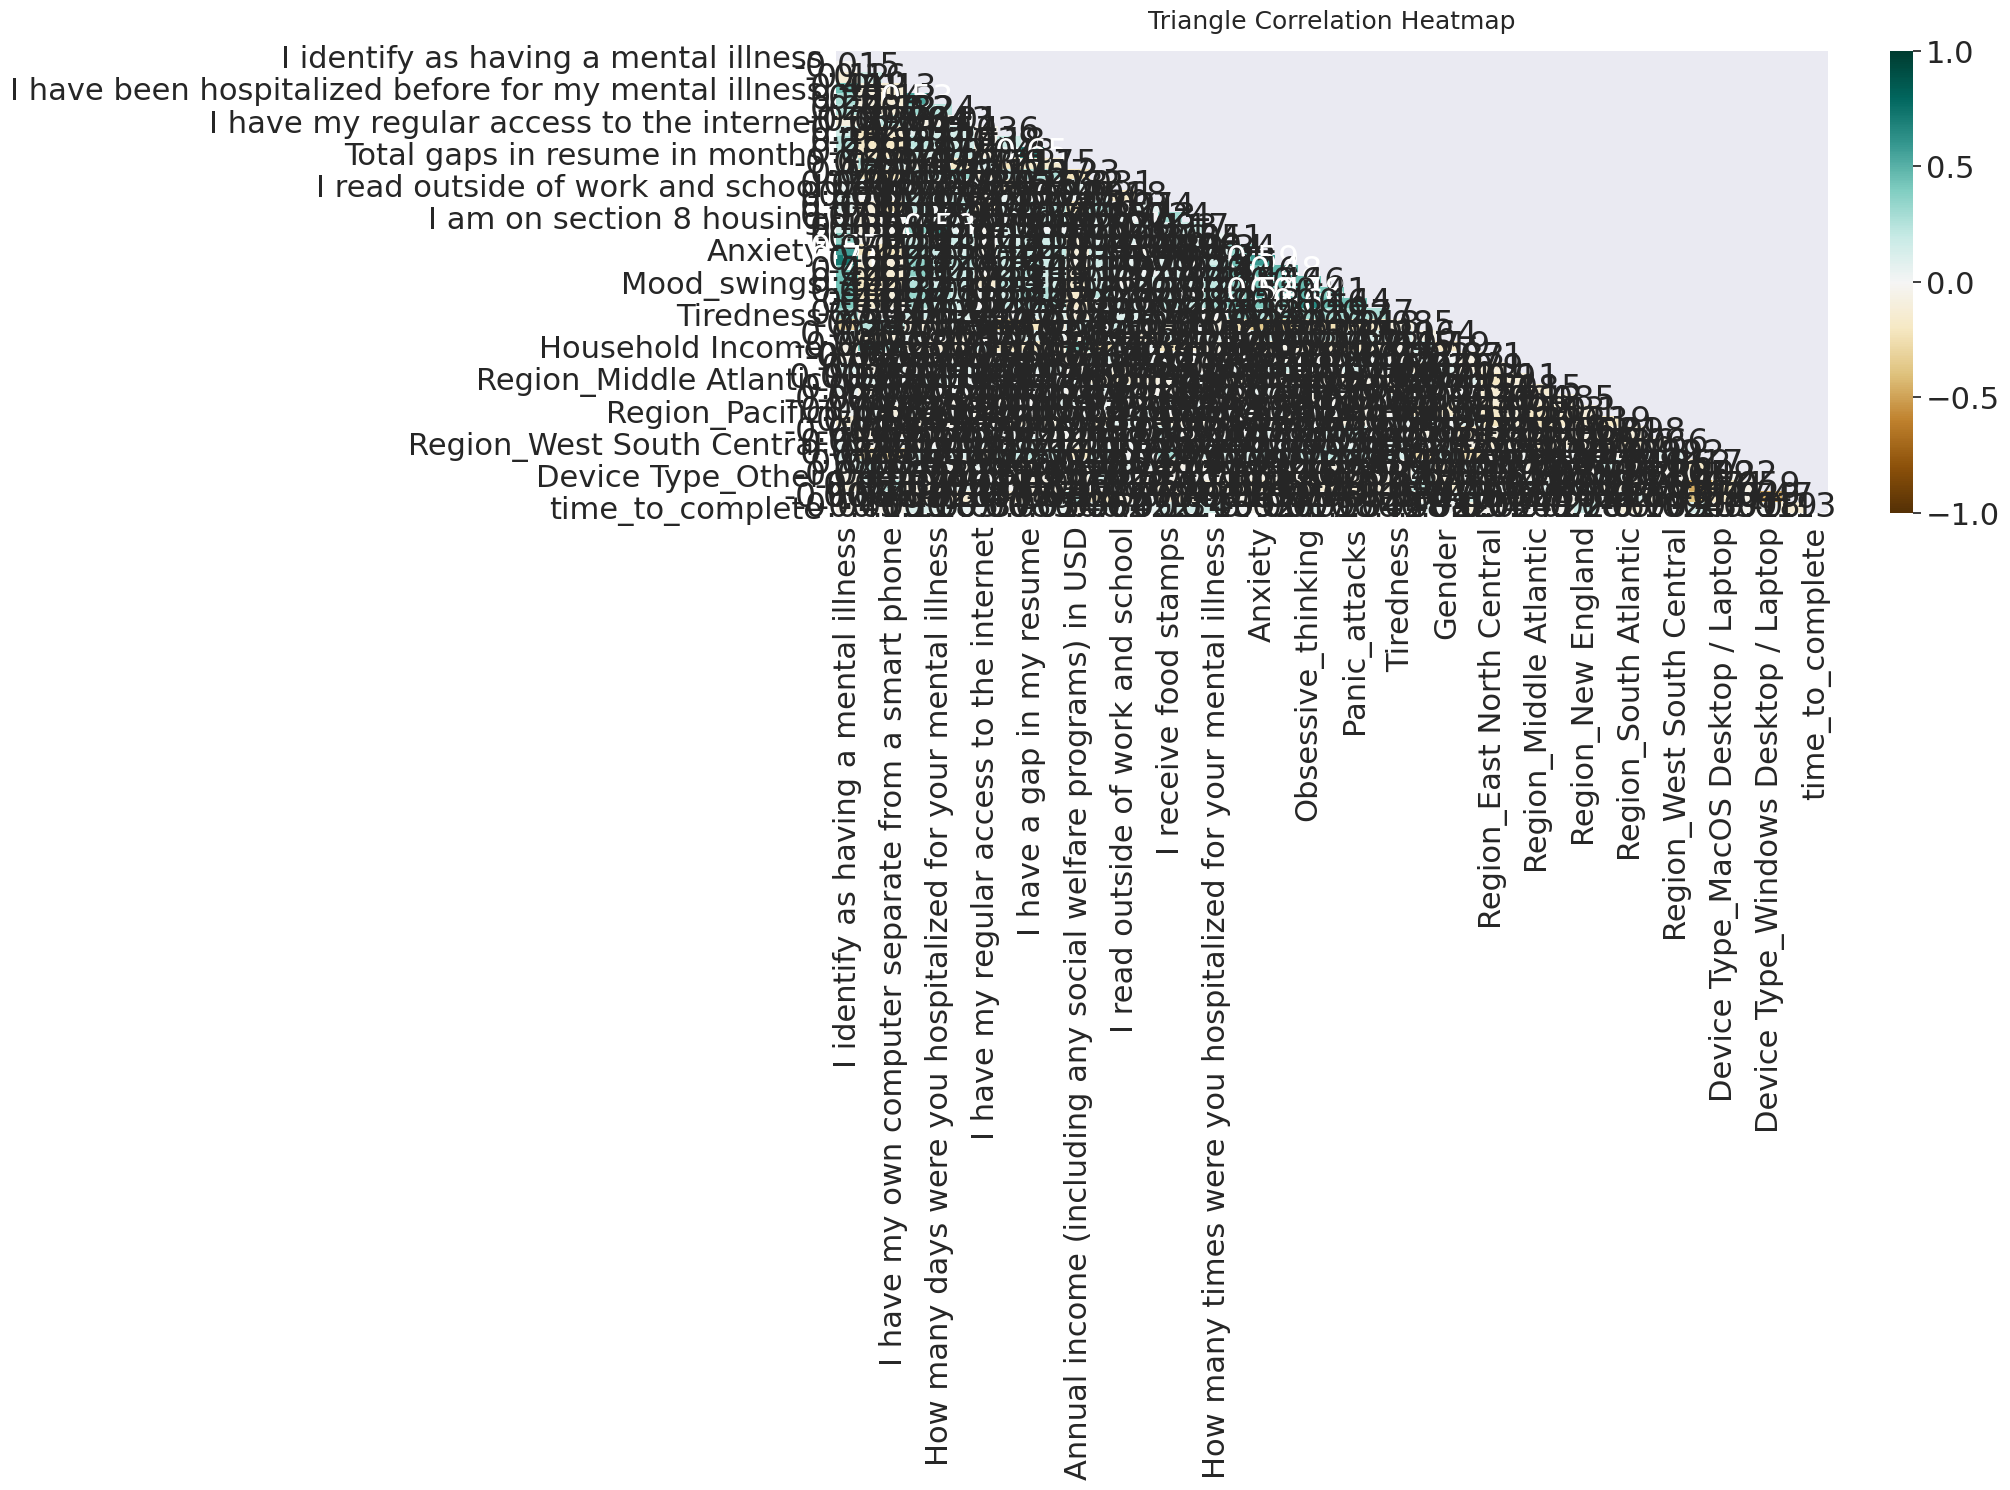

In [171]:
plt.figure(figsize=(16, 6))# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(encoded_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(encoded_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [173]:
encoded_data.corr()[['I am unemployed']].sort_values(by='I am unemployed', ascending=False)

,I am unemployed
I am unemployed,1.000000
I am legally disabled,0.332086
Total gaps in resume in months,0.273059
I receive food stamps,0.257080
I have a gap in my resume,0.251231
Panic_attacks,0.219173
I have been hospitalized before for my mental illness,0.185914
I live with my parents,0.169701
Depression,0.168274
Anxiety,0.166287


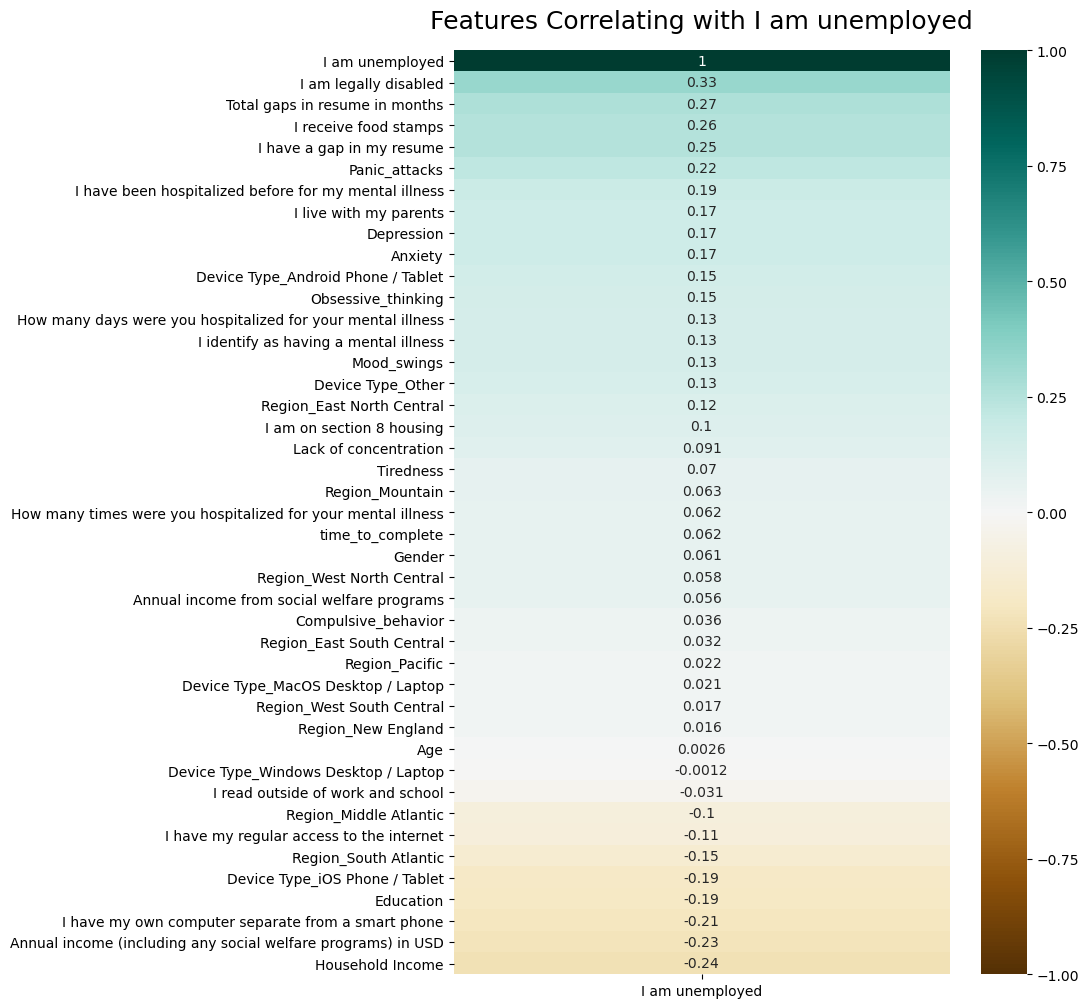

In [174]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(encoded_data.corr()[['I am unemployed']].sort_values(by='I am unemployed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with I am unemployed', fontdict={'fontsize':18}, pad=16);
plt.savefig('../img/target-feature-corr.png', bbox_inches='tight')

<AxesSubplot:>

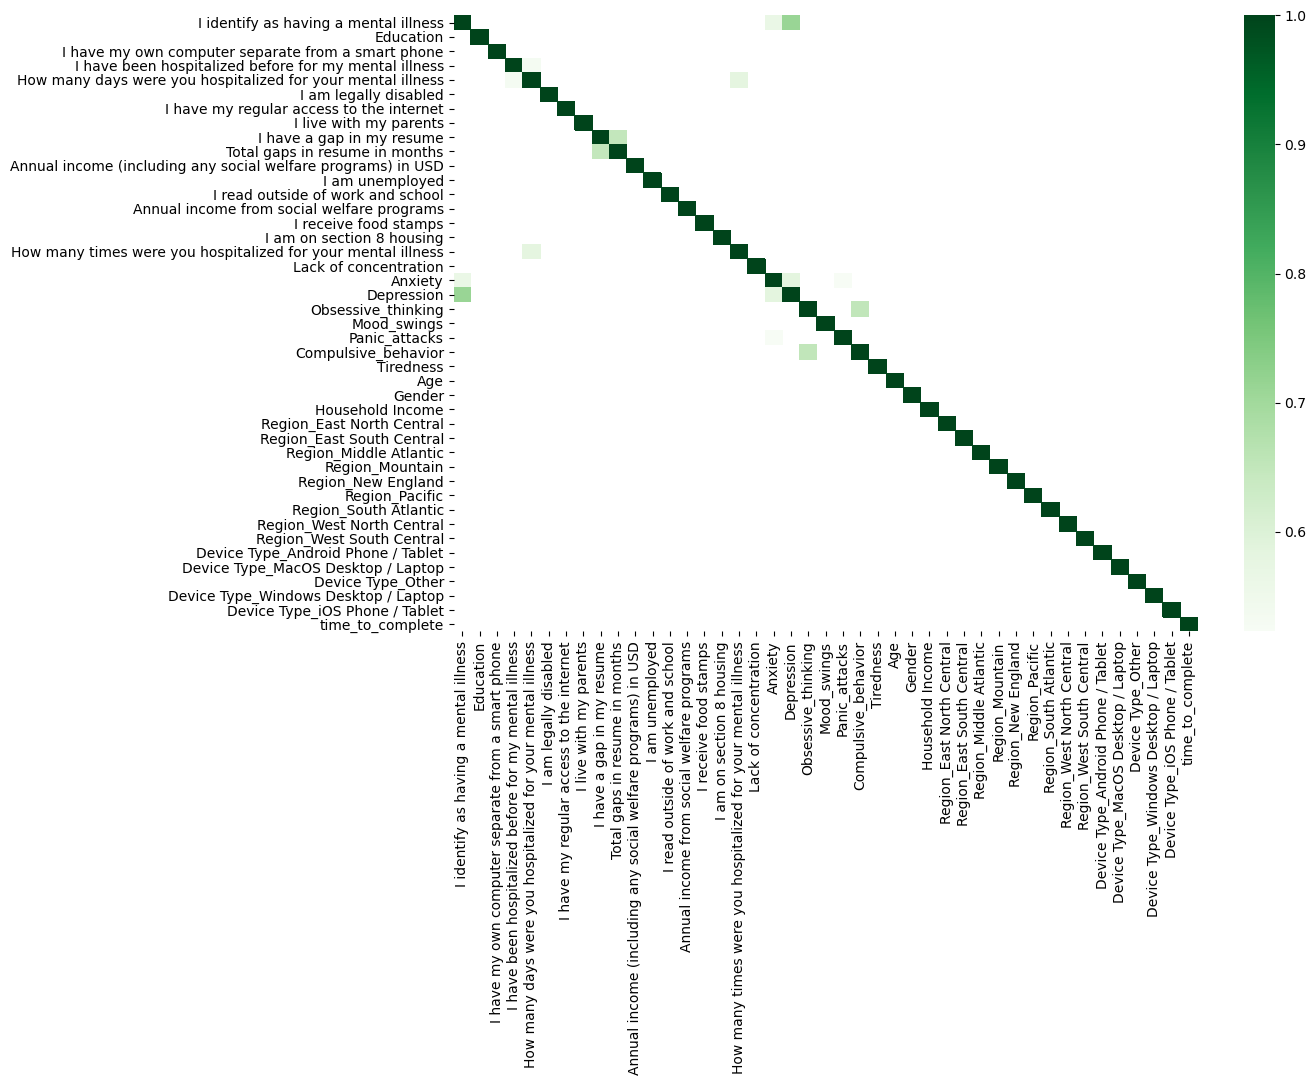

In [175]:
corr = encoded_data.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

<b>Interestingly, there is NOT a strong correlation between income levels (bucket columns or numerical columns) and the unemployment target. </b> I thought there would be high colinearity here and would probably drop the Annual income columns but this analysis leads me to keep them in the model.

### Feature-Feature Correlation

In [176]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
top_f_f_corr = get_top_abs_correlations(encoded_data, 10)
print(top_f_f_corr)

Top Absolute Correlations
I identify as having a mental illness                        Depression                                                      0.711796
Obsessive_thinking                                           Compulsive_behavior                                             0.652469
I have a gap in my resume                                    Total gaps in resume in months                                  0.647831
Anxiety                                                      Depression                                                      0.585887
How many days were you hospitalized for your mental illness  How many times were you hospitalized for your mental illness    0.583717
I identify as having a mental illness                        Anxiety                                                         0.566523
I have been hospitalized before for my mental illness        How many days were you hospitalized for your mental illness     0.532061
Anxiety                             

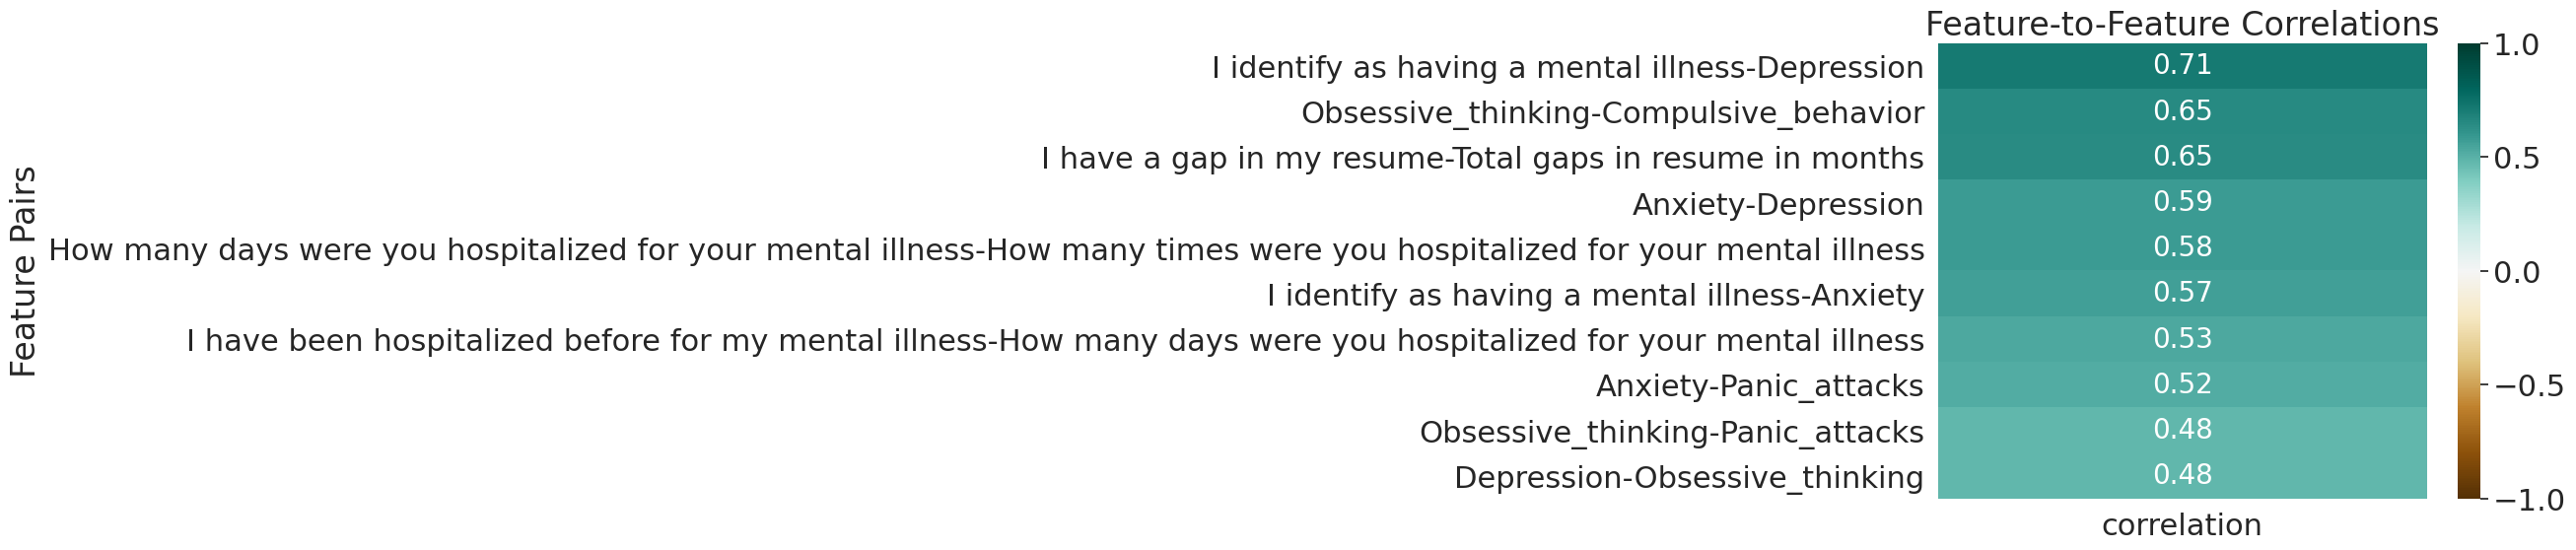

In [177]:
df_f_f_corr = pd.DataFrame(data=top_f_f_corr.values, index=top_f_f_corr.index, columns=['correlation'])
plt.figure(figsize=(8, 6))

sns.set(font_scale=2.0) 
heatmap2 = sns.heatmap(df_f_f_corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', annot_kws={"size": 20})
heatmap2.set_title('Feature-to-Feature Correlations')
heatmap2.set_ylabel('Feature Pairs')
plt.savefig('../img/top_10_feat_feat_corr.png', bbox_inches='tight')

Male-Female correlation is -1.0 since there was no alternative choices.

Depression is highly correlated with 'I identify with having a mental illness', more so than any other mental health symptom.

Obsessive thinking and compulsive behavior often go hand-in-hand and we see a strong correlation between them here. Same goes for ansiety and depression.

Unsuprisingly, we see variations of questions (e.g. 'How many days were you hospitalized for your mental illness' and  'How many times were you hospitalized for your mental illness') and categorical and numerical versions of the same question (e.g. 'I have been hospitalized before for my mental illness' and 'How many days were you hospitalized for your mental illness') have a high correlations.

# Initial Modeling

In [178]:
y = encoded_data['I am unemployed']
X = encoded_data.drop(['I am unemployed'], axis=1)

In [179]:
X

,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total gaps in resume in months,Annual income (including any social welfare programs) in USD,I read outside of work and school,Annual income from social welfare programs,I receive food stamps,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive_thinking,Mood_swings,Panic_attacks,Compulsive_behavior,Tiredness,Age,Gender,Household Income,Region_East North Central,Region_East South Central,Region_Middle Atlantic,Region_Mountain,Region_New England,Region_Pacific,Region_South Atlantic,Region_West North Central,Region_West South Central,Device Type_Android Phone / Tablet,Device Type_MacOS Desktop / Laptop,Device Type_Other,Device Type_Windows Desktop / Laptop,Device Type_iOS Phone / Tablet,time_to_complete
0,0,1,0,0,0,0,1,0,1,24,35,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,188.0
1,1,5,1,0,0,0,1,0,0,1,22,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
2,0,3,1,0,0,0,1,0,0,0,100,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,141.0
3,0,2,1,0,0,0,1,1,1,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,77.0
4,1,3,1,1,35,1,1,0,1,33,32,1,30,0,0,4,1,1,1,1,1,1,1,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,126.0
328,0,2,1,0,0,0,1,1,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,91.0
329,0,2,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,3,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,341.0
330,1,2,0,1,1,1,1,1,1,30,12,1,12,1,0,3,1,1,1,1,1,1,1,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,194.0


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=17, stratify=y)

enc_rf_model = RandomForestClassifier(random_state=17)
enc_rf_model.fit(X_train, y_train)
print(f'Accuracy:{enc_rf_model.score(X_test, y_test)}')

Accuracy:0.7164179104477612


In [181]:
y_pred = enc_rf_model.predict(X_test)
print(f'Recall:{recall_score(y_test, y_pred)}')

Recall:0.058823529411764705


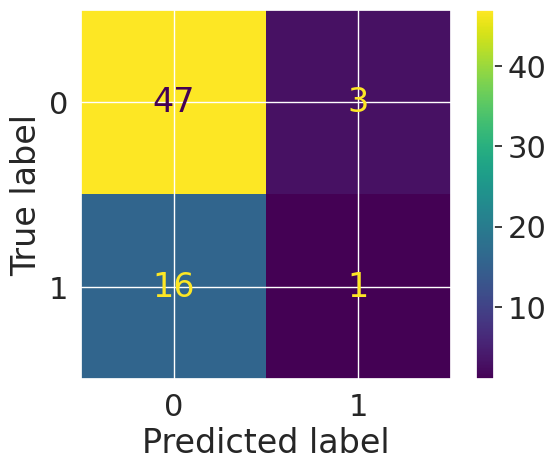

In [182]:
plot_confusion_matrix(enc_rf_model, X_test, y_test)

So False Negatives are the main error the model makes, which is reflected in the recall.

In [183]:
run_cv_rf(X, y)

Accuracy Scores: [0.73529412 0.82352941 0.6969697  0.6969697  0.81818182 0.75757576
 0.81818182 0.78787879 0.81818182 0.72727273]
	Mean:0.7680035650623886
Recall Scores: [0.22222222 0.66666667 0.11111111 0.         0.66666667 0.33333333
 0.5        0.125      0.625      0.25      ]
	Mean:0.35
F1 Scores: [0.28571429 0.70588235 0.30769231 0.         0.63157895 0.36363636
 0.5        0.36363636 0.8        0.30769231]
	Mean:0.4265832928681226


In [184]:
encoded_data.to_pickle('../data/encoded_df.pkl')